In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings    # to manipulate warnings details
warnings.filterwarnings('ignore')# is to ignore the warnings thrown by the modules (gives clean results)
%matplotlib inline   
#to enable the inline plotting.

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Statistical summary for numeric columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#No.of rows and columns
df.shape

(891, 12)

**Exploratory Data Analysis**
Before preprocessing let us explore the categorical columns.

<AxesSubplot:xlabel='Survived', ylabel='count'>

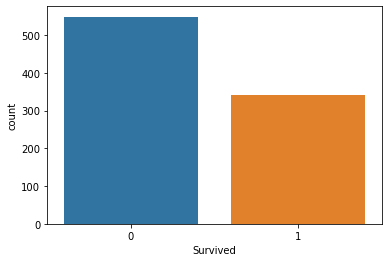

In [6]:

## categorical attributes
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

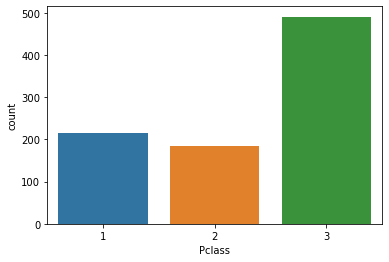

In [7]:
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

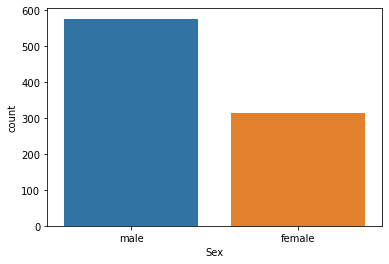

In [8]:
sns.countplot(df['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

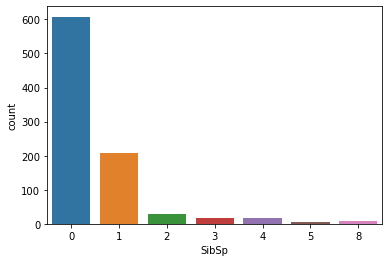

In [9]:
sns.countplot(df['SibSp'])
#SibSp=0 means the passenger is travelling solo

<AxesSubplot:xlabel='Parch', ylabel='count'>

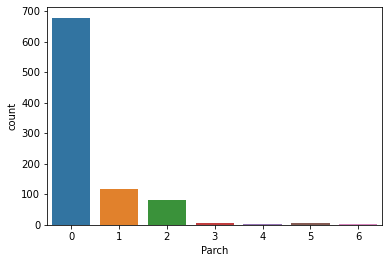

In [10]:
sns.countplot(df['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

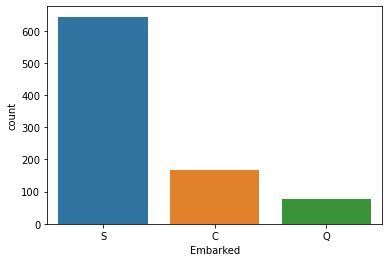

In [11]:
sns.countplot(df['Embarked'])
#Embarked contains the boarding port/cities of passengers.


There are three cities with S having the more number of values.
**Let us explore the numerical columns.**

<AxesSubplot:xlabel='Age', ylabel='Density'>

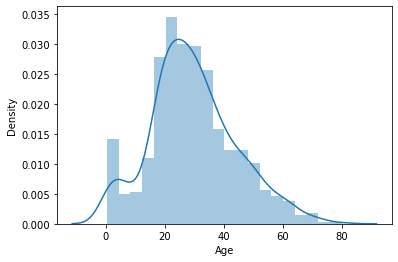

In [12]:
sns.distplot(df['Age'])


<AxesSubplot:xlabel='Fare', ylabel='Density'>

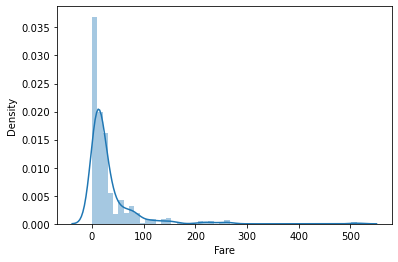

In [13]:
sns.distplot(df['Fare'])


We need to do preprocessing these data to convert the right-skewed curve into a normal distribution.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

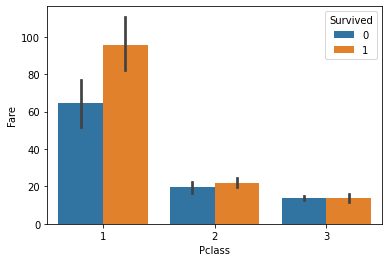

In [14]:
#Let us display the difference between 'Pclass' and 'Survived' with the help of a barplot.
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')
#This plot has a comparison of survived passengers depending on the ticket fare and passenger class.

**Data Pre-processing**

    1. Drop unneccesary columns(Name,Ticket)
    2. Handle Null Values
    3. Label Encoding(Convert labels to numeric type)
    4. Scaling/Standardization of data
    5. Handling distributions of numeric data....

In [15]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
#axis=1 represents drop by column
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [16]:
#Verify if there are null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
#Dropping the cabin column as it has more null values also irrelevant to the prediction
df=df.drop(columns='Cabin',axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
#Impute null value of age by its mean
df['Age']=df['Age'].fillna(df['Age'].mean())


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [21]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Now there are no null values in the data

In [23]:
#Log transformation for Normal data distribution

#We have to normalize the column 'Fare'. 

#sns.distplot(df['Fare'])
df['Fare'] = np.log(df['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

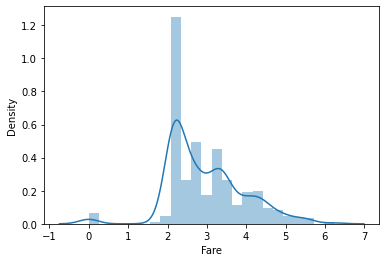

In [24]:
sns.distplot(df['Fare'])

It is not a complete normal distribution, but we can manage with this curve.



<AxesSubplot:>

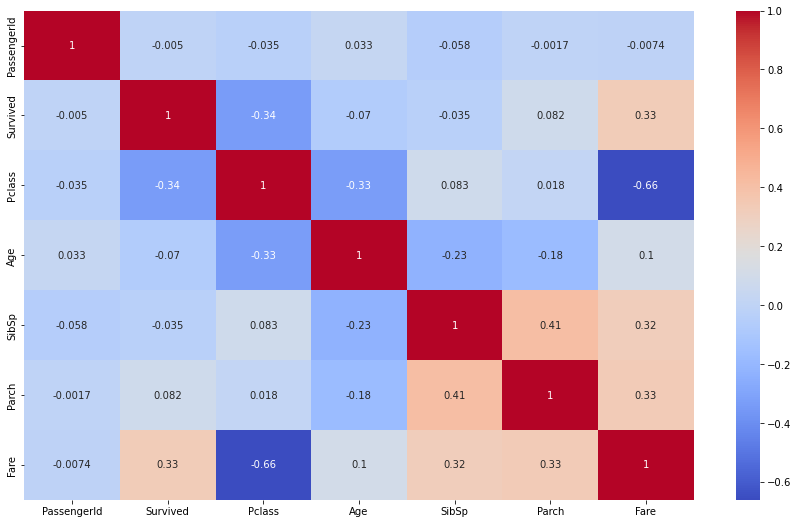

In [25]:
#Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

The 'Fare' shows a negative correlation with Pclass.
Additionally, Fare has some level of correlation with all classes. Hence, the Fare column is an essential attribute for this project.

In [26]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In column 'Sex', the male is converted to '1' and the female is converted to '0'.
Likewise in 'Embarked' the cities are assigned some defined number.



**Logistic regressions and tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models**

**Train_Test Split**

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score
# define X and y
X = df.drop(columns=['PassengerId', 'Survived'], axis=1)
y = df.Survived
def classify(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print('Accuracy:', model.score(X_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))
#We use cross val score() for better validation of the model.

#Here, cv=5 means that the cross-validation will split the data into 5 parts.

#np.abs() will convert the negative score to positive and np.mean() will give the average value of 5 scores.


**Let's train our data with different models.**

In [28]:
#Logistic Regression:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [29]:
#Decision Tree:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7174887892376681
CV Score: 0.7688280710564308


In [30]:
#Random Forest:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.7982062780269058
CV Score: 0.8114682066411399


RandomForest Algorithm got higher cross validation score. Hence, let's train the model with randomforest for the entire data and save resultant predictions.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)

In [40]:
pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [41]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

# Add the indexes as a new column
# results_df['Index'] = results_df.index

# Print the DataFrame
print(results_df)

     Actual  Predicted
709       1          0
439       0          0
840       0          0
720       1          1
39        1          0
..      ...        ...
880       1          1
425       0          0
101       0          0
199       0          1
424       0          0

[223 rows x 2 columns]


In [42]:
from sklearn.metrics import accuracy_score
# Calculate accuracy score
accuracy = accuracy_score(y_test, pred)

# Print the accuracy score
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.81


In [43]:
# Write predictions to csv file
# We don't have any significative field so we saved the index
# Save to file. This file will be visible after publishing in the output section
results_df.to_csv("Titanic_results.csv")